# EasyVisa Project


## Context:
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries for different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Import Dataframe

In [2]:
visa = pd.read_csv('EasyVisa.csv')
data = visa.copy()

## Analyze Data structure

In [3]:
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [5]:
data.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns

### Dropping case_id column as it is just for identification and will not affect analysis

In [6]:
data = data.drop('case_id', axis=1)
data.shape

(25480, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


* The dataset has no null obesrvations
* There are 8 columns of object data type. The remaining are 2 integer and 1 float

### Converting object type columns to category

In [8]:
cols = data.select_dtypes(include=['object'])
cols.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [9]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


* Memory usage reduced to < 1MB

In [11]:
# Checking for duplicated values
data.duplicated().sum()

0

# Exploratory Data Analysis

* Under EDA, we will look at the features that mainly influence the visa application status of potential new employees coming in as immigrants.
* We will look at how these features interact with each other before we proceed to build a model to facilitate case processing.
* We will do some statistical analysis also in addition to visual analysis.

In [12]:
# Numerical data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* Min number of emplyees is -26 which signifies column needs to be treated for negative values to see true min.
* Year of establishment ranges from as far back as 1800 and most recent is 2016.
* Prevailing wage range is quite high (between 2 and 319,210) with an average of 74,455. This may point to different units of wage (hourly, weekly, monthly, yearly)

In [13]:
# Categorical data summary
data.describe(include=['category']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* case_status is the target variable with 67% records 'Certified' or employee had visa approved
* The highest number of foreign employees are of Asian origin (66%)
* 58% of applicants have job experience
* 88% do not require job training, which shows most applicants may hit the ground running
* 28% intend to work in the Northeast. This may point to more lucrative opportunities in that region
* Unit of wage in the dataset is yearly for most records. We will have to treat that column so all records match in unit
* 89% of applicants are seeking full time positions

### Fixing the negative values in 'no_of_employees' column

In [14]:
data.no_of_employees[data.no_of_employees < 0].shape[0]

33

* There are 33 entries where no_of_employees is a negative number

In [15]:
# Taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

# Confirming there are no remaining negative values in employees column
data.no_of_employees[data.no_of_employees < 0].shape[0]

0

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* Now we see min number of employees in employer's company is 11. This represents a very small company, might be a startup. Average number of employees in a company is above 5000

### Checking the count of unique values in all categorical columns

In [17]:
cols_cat = data.select_dtypes(['category'])

In [18]:
for column in cols_cat:
    print(data[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

* We do not see any odd unique values in category columns

# Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Number of employees

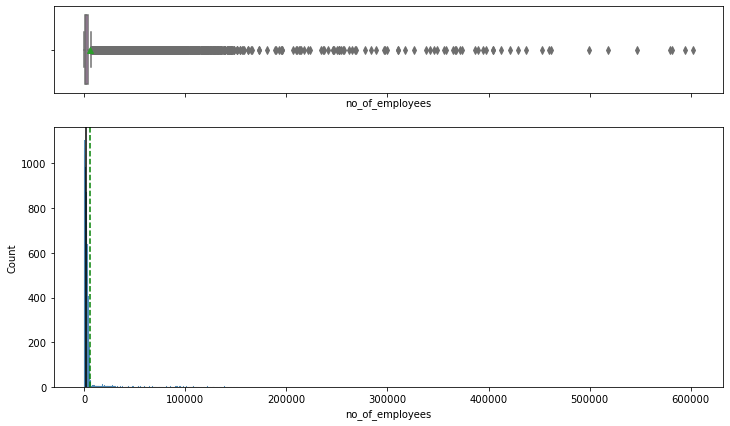

In [20]:
histogram_boxplot(data, 'no_of_employees')

* We see a lot of outliers with the number of employees; with a min of 11 and an average ~ 6000 employees.
* It appears most of the companies are highly staffed and just a few are samll sized companies with not as many employees.

### Prevailing Wage

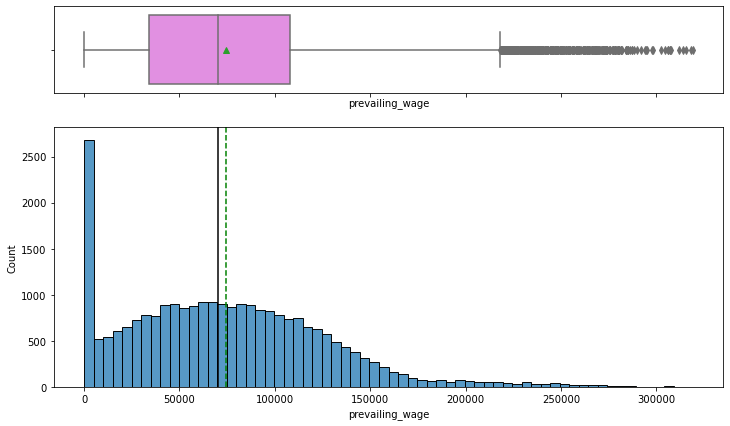

In [21]:
histogram_boxplot(data, 'prevailing_wage')

* The average prevailing wage is almost 75,000; implying high paying jobs that might need high skill levels.
* Quite a number of people are paid < 100 but may point to an hourly or weekly wage rate as seen in the dataset.

In [22]:
# checking the observations which have less than 100 prevailing wage
data.prevailing_wage[data.prevailing_wage < 100].shape[0]

176

* 176 rows of data have prevailing wage < 100

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Continent

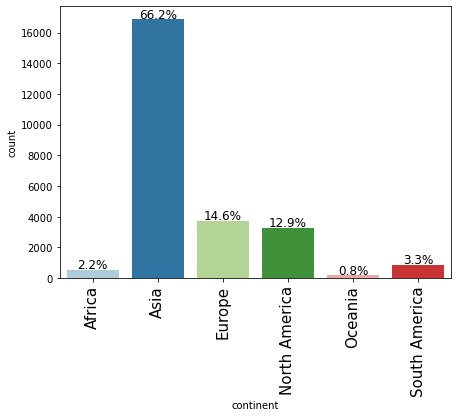

In [24]:
labeled_barplot(data, "continent", perc=True) 

* The most workers in the applications are of Asian origin (66%), followed by Europe (15%) and North America (13%)

### Education of Employee

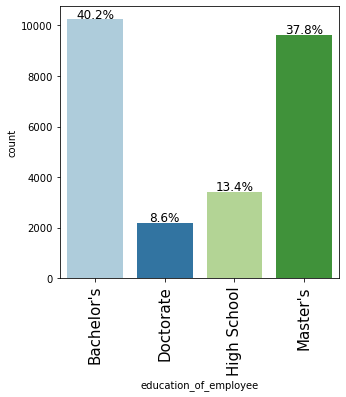

In [25]:
labeled_barplot(data, "education_of_employee", perc=True) 

* About 40% of the employees have a Bachelor's degree followed by Master's degree employees who represent ~ 38%.
* All employees have at least a High School diploma.

### Job experience

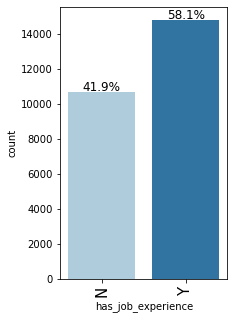

In [26]:
labeled_barplot(data, "has_job_experience", perc=True) 

* More than 50% of the employees have previous job experience.
* 42% do not have any and are potential first timers on the job.

### Job training

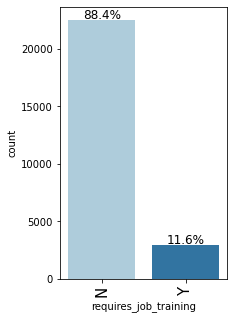

In [27]:
labeled_barplot(data, 'requires_job_training', perc=True)

* Almost 90% of employees do not require job training.
* The remaining employees who require job training might point to entry level individuals with no relevant prior expertise.

### Region of employment

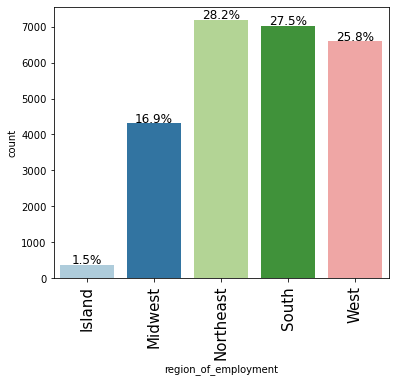

In [28]:
labeled_barplot(data, 'region_of_employment', perc=True)

* Most foreign workers intend to work in the Northeast, followed by the South then the West.
* The Island regions are least preferred, hence may not have as lucrative jobs as other regions.

### Unit of Wage

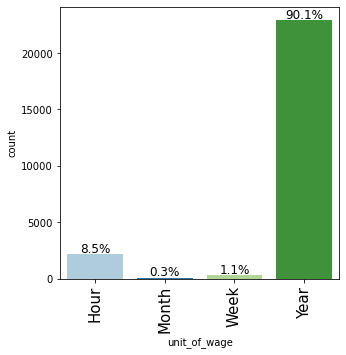

In [29]:
labeled_barplot(data, 'unit_of_wage', perc=True)

* About 90% of wages in the dataset are on a yearly basis, ~ 9% are on an hourly basis.

### Case Status

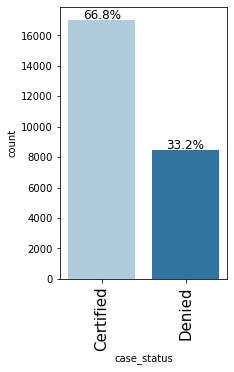

In [30]:
labeled_barplot(data, 'case_status', perc=True)

* From the collected data, two-thirds (~ 67%) of cases were certified, while 33% were denied.

# Bivariate Analysis

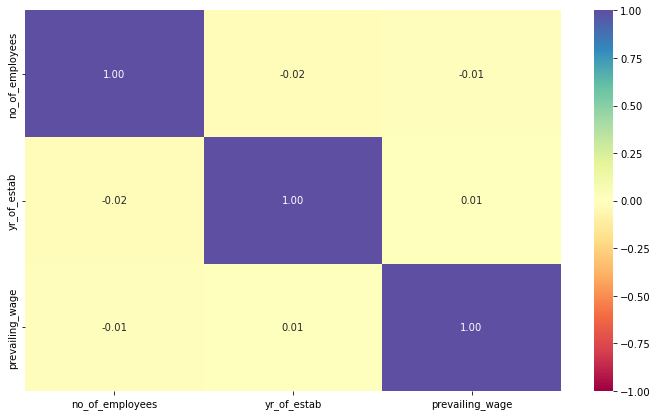

In [31]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* All the numeric columns show a very low positive correlation with each other.
* This implies that a unit increase in one feature increases another only marginally.

### Creating functions to help with further analysis

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


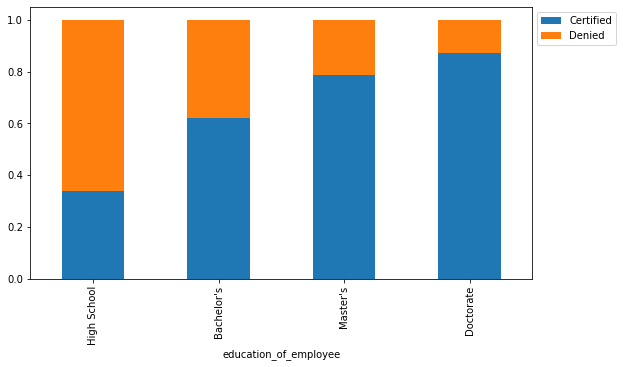

In [34]:
stacked_barplot(data, "education_of_employee", "case_status")

* Education level does have an impact on visa certification. We see that the visa certification rate is highest among doctorate degree holders (87%) and least among high school diploma holders (34%).

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

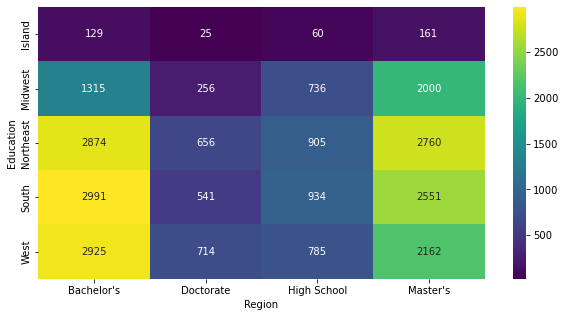

In [130]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data.region_of_employment, data.education_of_employee),
    annot=True,
    fmt="g",
    cmap="viridis"
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* It appears the South, Northeast and West regions have the highest requirements of talent, looking at the number of employees who have from a High school diploma to a Doctorate degree. The Island region has the least overall.

#### Percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


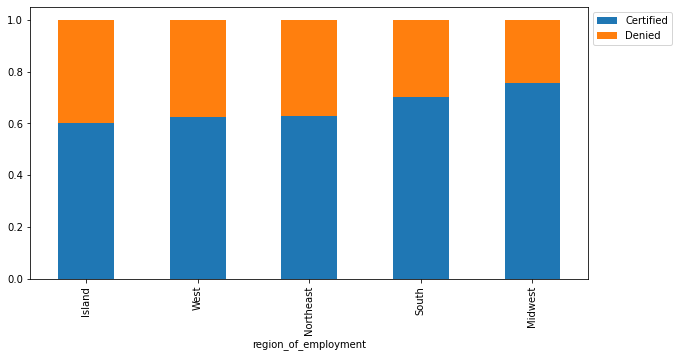

In [35]:
stacked_barplot(data, "region_of_employment", "case_status")

* Highest visa certification rate is seen for the Midwest region (76%), followed by the South (70%)
* The remaining regions have about the same certification rate (~ 60%)

### Continent vs Case status 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


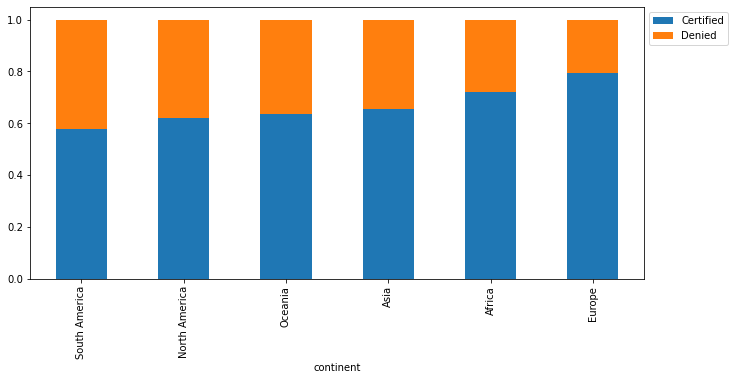

In [36]:
stacked_barplot(data, "continent", "case_status")

* Applicants from Europe are approved the most (79%), followed by Africa (72%) and Asia (65%)
* Least rate of certifications per continent is South America (58%)

### Work experience vs Case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


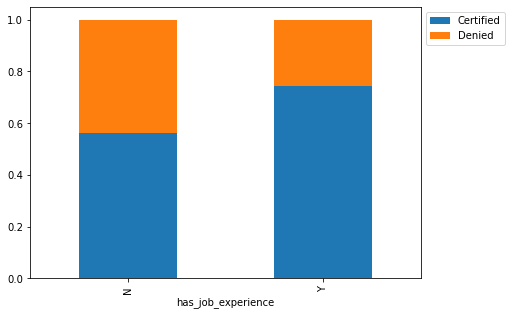

In [37]:
stacked_barplot(data, "has_job_experience", "case_status")

* 74% of employees with work experience get certified while 56% of those without work experience get certified.

### Work experience vs Job training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


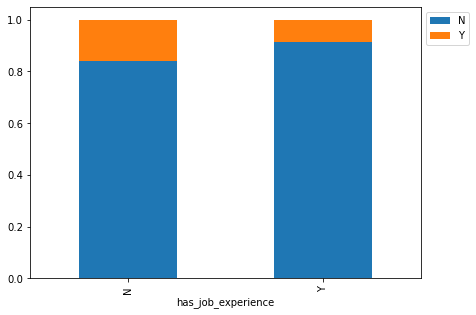

In [119]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

* We see that it is less likely for employees with prior work experience to require job training
* Less than 10% of those with work experience require job training and about 16% without work experience require job training

### Distribution of Prevailing wage wrt Case Status

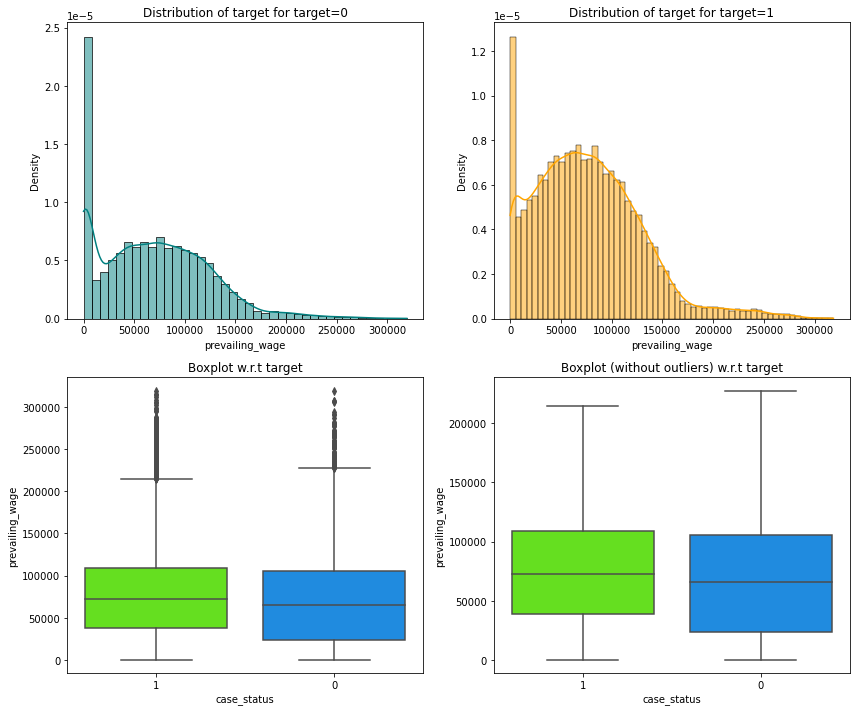

In [121]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

* Certified and denied cases have similar distributions in terms of min, 25%, median and 75%. We notice only denied cases have outliers above 210,000 prevailing wage.
* This shows the highest prevailing wage workers were denied. This could be attributed to higher risk or protecting US workers by affording them such opportunities also.

### Prevailing wage vs Region

<AxesSubplot:xlabel='region_of_employment', ylabel='prevailing_wage'>

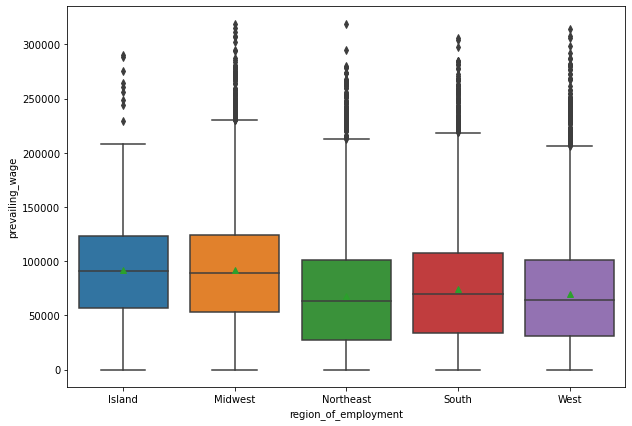

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", showmeans=True)

* The Island and Midwest regions have the highest average prevailing wages.
* The Northest, South and West regions have similar distributions and show the least average prevailing wages.

### Unit of wage vs Case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


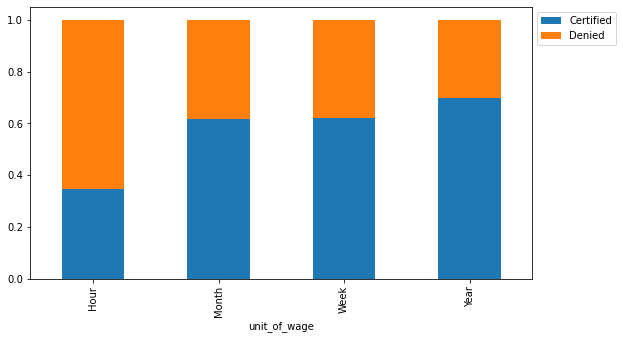

In [41]:
stacked_barplot(data, "unit_of_wage", "case_status")

* Checking if the different units of wages have an impact on the case status, we see that unit 'Year' has the highest percentage of approvals (70%), 'Month' and 'Week' units have about the same approval rate (62%) and 'Hour' the least with 35% certified cases.
* This confirms an impact of the different units on case status.

## Outlier Check

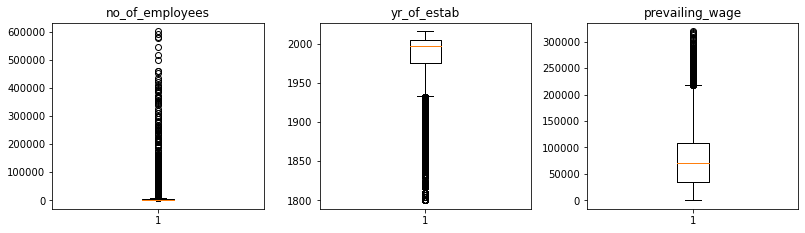

In [42]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Number of employees, year of establishment and prevailing wage all show outliers but we will not be treating them in this case as they will be relevant in our model and we want to avoid skewing the model.

## Data Preparation for Modeling

* We want to predict which visa will be certified.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [43]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(['case_status'], axis = 1)
y = data['case_status']

X = pd.get_dummies(X, columns = X.select_dtypes(include = ['category']).columns.tolist(), drop_first = True)

X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


In [44]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify = y)

In [45]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


### Model evaluation criterion
1. Model predicts that the visa application will get certified but in reality, the visa application should get denied - FP
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified - FN

#### Which case is more important?

Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

#### How to reduce the losses?

* F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model

In [48]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Model performance on training set

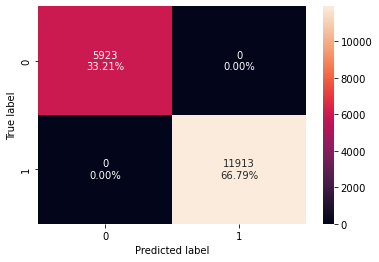

In [49]:
confusion_matrix_sklearn(model, X_train, y_train)

In [50]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Model performance on test set

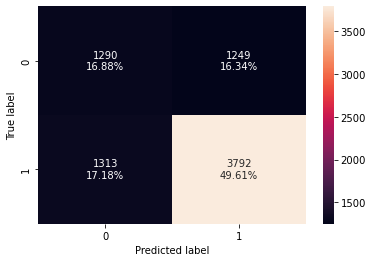

In [51]:
confusion_matrix_sklearn(model, X_test, y_test)

In [52]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


* Scores on test set are decent but model is overfitting on training set. We'll proceed with hyperparameter tuning

### Hyperparameter Tuning - Decision Tree

In [53]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring = scorer) 

grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

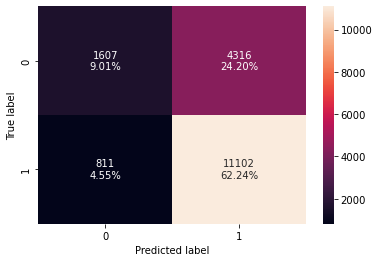

In [55]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [60]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


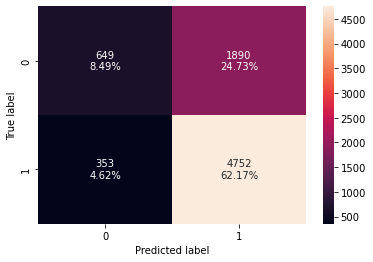

In [61]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [62]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Test performance \n", dtree_estimator_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


* We see that after hyperparameter tuning and with a balanced class weight, the model performs almost the same on both training and test sets.
* F1 score is good on both sets and quite similar ~ 0.81

## Bagging Classifier

In [63]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Model performance on training set

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


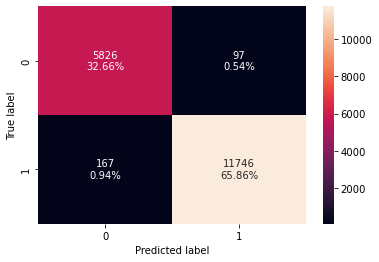

In [64]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf

#### Model performance on test set

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


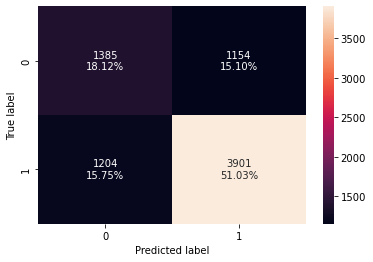

In [65]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

* Model is overfitting on training set; there is a noticable difference in performance scores when we compare both sets

## Hyperparameter Tuning - Bagging Classifier

In [66]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Model performance of training set

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


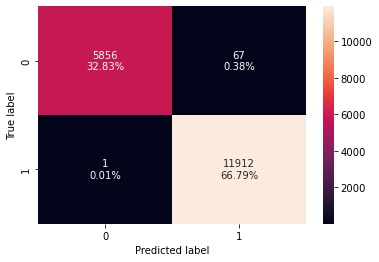

In [67]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimtaor_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_estimtaor_tuned_model_train_perf

#### Model performance on test set

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


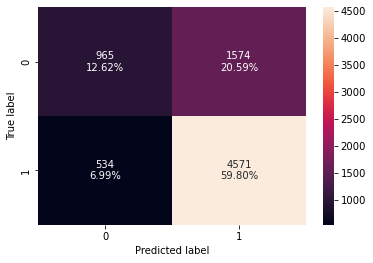

In [68]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimtaor_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
bagging_estimtaor_tuned_model_test_perf

* We see a substantial difference in peroformance scores in training and test sets, hence model is overfitting on training set

## Random Forest

In [70]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Model performance on training set

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


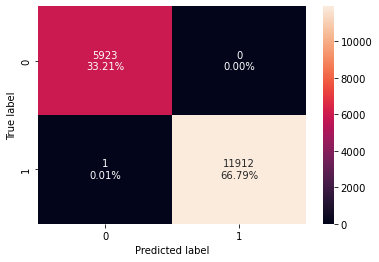

In [73]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) 
rf_estimator_model_train_perf

#### Model performance on test set

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


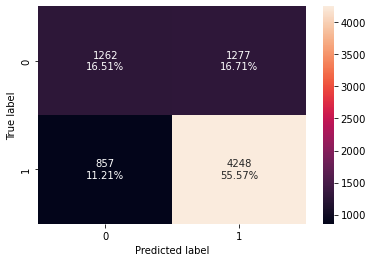

In [72]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) 
rf_estimator_model_test_perf

* We see a difference in scores between both sets; model is overfitting training set

## Hyperparameter Tuning - Random Forest

In [74]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Performance on training test

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


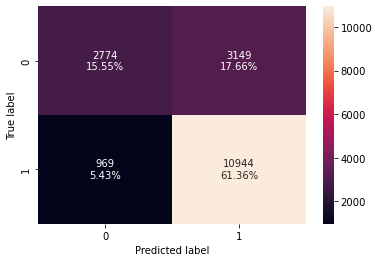

In [75]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) 
rf_tuned_model_train_perf

#### Performance on test set

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


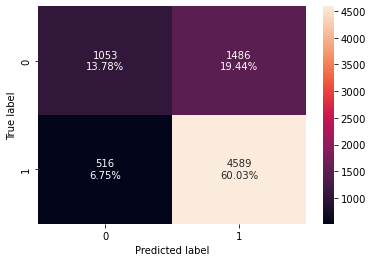

In [76]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) 
rf_tuned_model_test_perf

* Model scores on training set is close to test set.
* F1 score on test set is better than even decision tree and bagging classifier models.

## AdaBoost Classifier

In [77]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Performance on training test

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


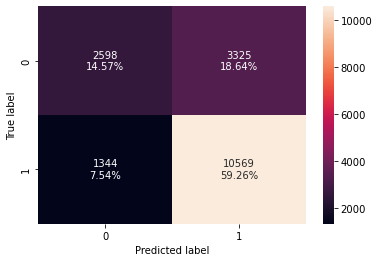

In [79]:
confusion_matrix_sklearn(abc, X_train, y_train)
abc_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
abc_model_train_perf

#### Performance on test test

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


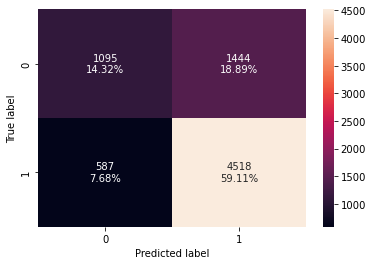

In [80]:
confusion_matrix_sklearn(abc, X_test, y_test)
abc_model_test_perf = model_performance_classification_sklearn(abc, X_test, y_test)
abc_model_test_perf

* The model fits well on train and test sets. Performance scores are similar
* F1 is ~ 0.82 on bith sets. Let's see if we can improve this even further with hyperparameter tuning

## Hyperparameter Tuning - AdaBoost Classifier

In [81]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Performance on training set

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


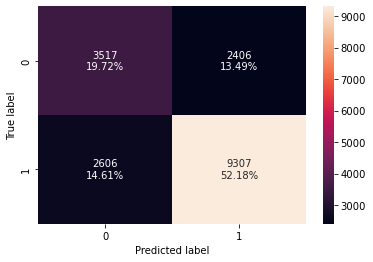

In [82]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

#### Performance on test set

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


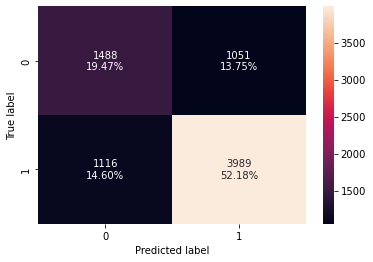

In [83]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

* After hypertuning we see that F1, accuracy and recall drop while precision increases
* Generally, the original AdaBoost model has a better model performance for our purpose as F1 is our score of interest

## Gradient Boosting Classifier

In [89]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Performance on training set

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


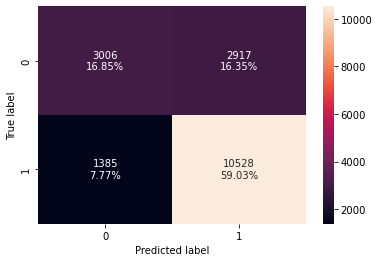

In [90]:
confusion_matrix_sklearn(gbc, X_train, y_train)
gbc_model_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
gbc_model_train_perf

#### Performance on test set

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


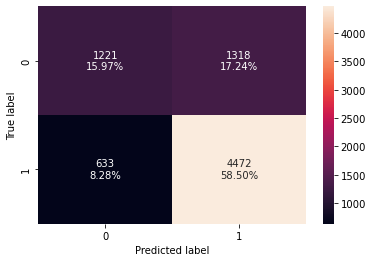

In [91]:
confusion_matrix_sklearn(gbc, X_test, y_test)
gbc_model_test_perf = model_performance_classification_sklearn(gbc, X_test, y_test)
gbc_model_test_perf

* Scores are close on training and test sets. Let's perform hyperparameter tuning to see if it improves

## Hyperparameter Tuning - Gradient Boosting Classifier

In [92]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Performance on training set

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


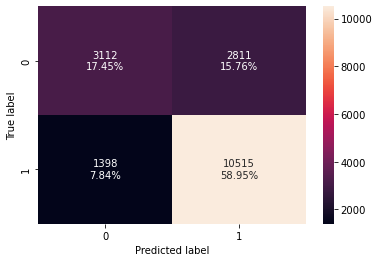

In [93]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


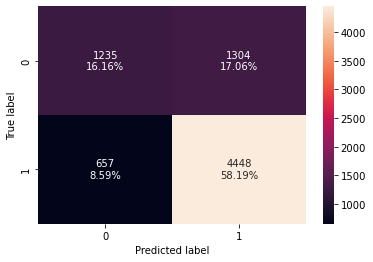

In [94]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

* Model performs well on both sets and not very different from untuned model

In [97]:
!pip install xgboost
from xgboost import XGBClassifier

## XGBoost Classifier

In [98]:
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

#### Performance on training set

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


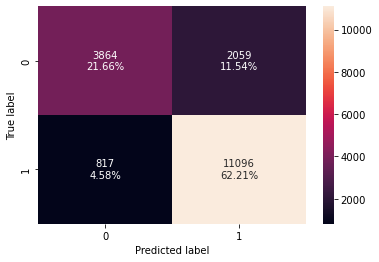

In [99]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

#### Performance on test set

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


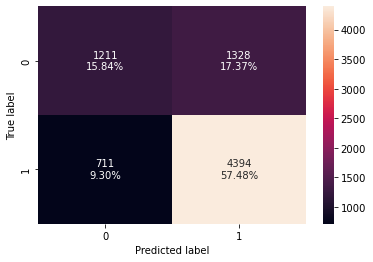

In [100]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

* Model seems to be slightly overfitting on the training set as performance scores are a bit higher on training set than on test set

## Hyperparameter Tuning - XGBoost Classifier

In [101]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

#### Performance on training set

,Accuracy,Recall,Precision,F1
0,0.765867,0.88139,0.791676,0.834128


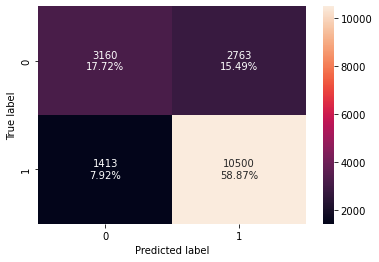

In [103]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

#### Performance on test set

,Accuracy,Recall,Precision,F1
0,0.745945,0.871694,0.775667,0.820882


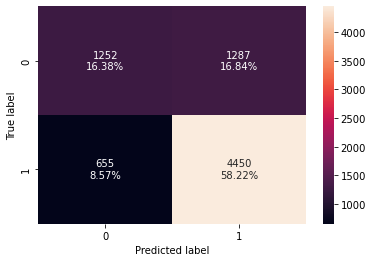

In [104]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

* We see that after tuning the xgboost hyperparameters, the model is no longer overfitting the training set and gives a good F1 score while giving a good general performance on both training and test data.

## Stacking Classifier

In [106]:
estimators = [
    ("AdaBoost", abc),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=Tru...
                                                 

#### Performance on training set

,Accuracy,Recall,Precision,F1
0,0.769231,0.891295,0.790089,0.837646


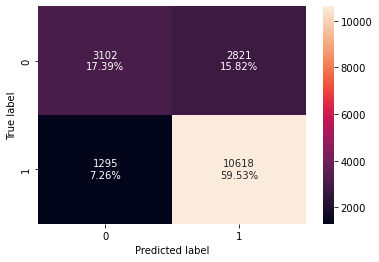

In [108]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

#### Peformance on test set

,Accuracy,Recall,Precision,F1
0,0.744113,0.878942,0.7703,0.821043


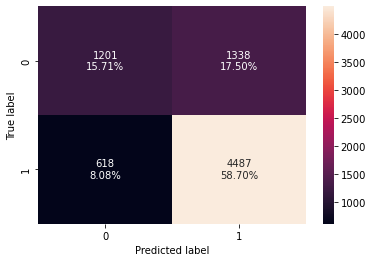

In [109]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

* Stacking classifier model is giving a similar performance on both sets and not largely different from the xgBoost model.
* The confusion matrix shows the model can identify majority of cases that should be certified as compared to denied.

## Comparing All Models

In [112]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimtaor_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        abc_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.765867,0.769231
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.881390,0.891295
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.791676,0.790089
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.834128,0.837646


In [113]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimtaor_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        abc_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.745945,0.744113
Recall,0.742801,0.930852,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.871694,0.878942
Precision,0.752232,0.715447,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.775667,0.770300
F1,0.747487,0.809058,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820882,0.821043


### Observations:
   * Most of the models are overfitting the training set in terms on F1-score
   * The stacking classifier gives the highest F1-score on the test set and gives a good generalized performance 

## Important features of the final model

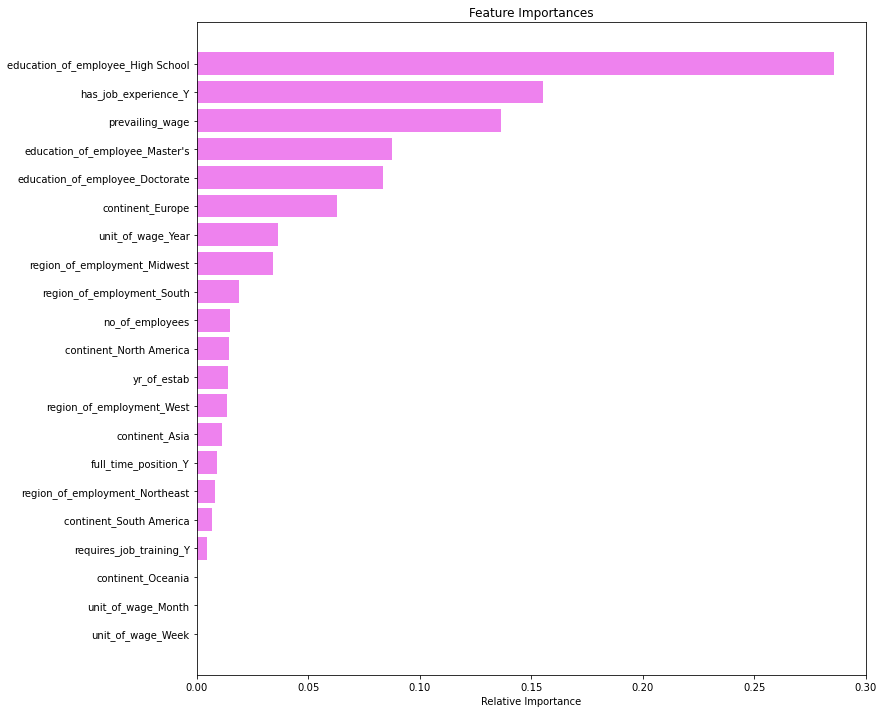

In [115]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* High school education of employee is the most important feature in identifying case status, followed by job experience (Y) and prevailing wage.

# Conclusion and Recommendations

* From model building, we see that a couple of the models give a good generalized performance but as we're trying to minimize both false positives and false negatives, we select the stacking classifier model as it gives the highest F1 score, while still generalizing well on other scores.
* This will ensure applications are certified at an F1 score rate of 0.82, with an accuracy of 74%
* We see that education is the most important factor in certifying or denying a visa application case for foreign workers.
* At least a high school education is preferred, with an advanced degree boosting an employees chances of having their case certified.
* An employee having prior work experience is the second most important followed by the prevailing wage in an employee's intended field of work. 
* As seen in EDA, 74% of employees with prior work experience get certified. Therefore prior work experience, coupled with a good level of education boost an empployee's chances of getting certified. This also makes sure the best talent is being recruited and certified and companies spend less on job training as we have also seen that the employees who do not require job training mostly have prior work experience in a specific field.
* Due to the above mentioned reasons, the OFLC should make the mix in education of an applicant, their level of work experience and a cross matching of the prevailing wage in a speicific field the topmost criteria in certifying or denying applications, without giving bias to an individual's continent of origin to make sure the best talent is recruited from around the world.
